In [587]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import warnings as warning


In [588]:
data=pd.read_csv('garments_worker_productivity.csv')

In [589]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [590]:
data.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


In [591]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [592]:
data.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [593]:
data.drop(columns=['date','quarter', 'day','wip', 'idle_time', 'idle_men',
                   'no_of_style_change'], errors='ignore', inplace=True)


In [594]:
data.columns

Index(['department', 'team', 'targeted_productivity', 'smv', 'over_time',
       'incentive', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [595]:
data.isna().sum().sum()

np.int64(0)

### No duplicates and na values found

In [596]:
data.head(5)

,department,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,sweing,8,0.80,26.16,7080,98,59.0,0.940725
1,finishing,1,0.75,3.94,960,0,8.0,0.886500
2,sweing,11,0.80,11.41,3660,50,30.5,0.800570
3,sweing,12,0.80,11.41,3660,50,30.5,0.800570
4,sweing,6,0.80,25.90,1920,50,56.0,0.800382


Text(0, 0.5, 'over_time')

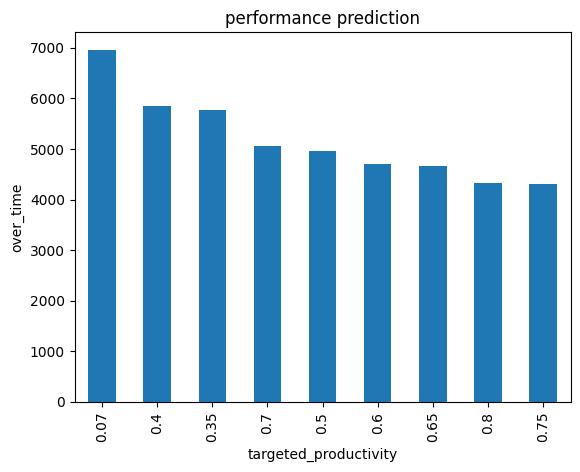

In [597]:
data.groupby("targeted_productivity")['over_time'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title ('performance prediction')
plt.xlabel('targeted_productivity')
plt.ylabel('over_time')

In [598]:
data.head()

,department,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,sweing,8,0.80,26.16,7080,98,59.0,0.940725
1,finishing,1,0.75,3.94,960,0,8.0,0.886500
2,sweing,11,0.80,11.41,3660,50,30.5,0.800570
3,sweing,12,0.80,11.41,3660,50,30.5,0.800570
4,sweing,6,0.80,25.90,1920,50,56.0,0.800382


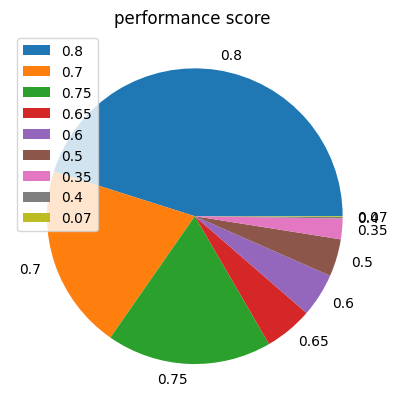

In [599]:
data["targeted_productivity"].value_counts().plot(kind='pie', legend=True)
plt.title('performance score ')
plt.ylabel('')  # Hide the y-label
plt.show()

In [600]:
data['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [601]:
data['over_time'].describe()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

In [602]:
data.describe()

,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,4567.460317,38.210526,34.609858,0.735091
std,3.463963,0.097891,10.943219,3348.823563,160.182643,22.197687,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,1440.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,3960.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,6960.000000,50.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,25920.000000,3600.000000,89.000000,1.120437


In [603]:
data.groupby([ "department" , "targeted_productivity" ,"actual_productivity"])['over_time'].mean().sort_values(ascending=False)


department  targeted_productivity  actual_productivity
sweing      0.35                   0.349951               25920.000000
            0.80                   0.800107               15120.000000
finishing   0.70                   0.649662               15000.000000
sweing      0.80                   0.800025               14640.000000
            0.70                   0.700134               13800.000000
finishing   0.80                   0.919905               12600.000000
sweing      0.70                   0.750162               12180.000000
finishing   0.70                   0.460579               12000.000000
sweing      0.80                   0.555500               10770.000000
                                   0.900216               10620.000000
            0.70                   0.800303               10620.000000
            0.80                   0.800117               10620.000000
                                   0.851174               10620.000000
                      

In [604]:
df_numeric = data.select_dtypes(include=[np.number])

In [605]:

df_numeric.corr()['targeted_productivity'].sort_values(ascending=False)


targeted_productivity    1.000000
actual_productivity      0.421594
incentive                0.032768
team                     0.030274
smv                     -0.069489
no_of_workers           -0.084288
over_time               -0.088557
Name: targeted_productivity, dtype: float64

In [606]:
data.head()

,department,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,sweing,8,0.80,26.16,7080,98,59.0,0.940725
1,finishing,1,0.75,3.94,960,0,8.0,0.886500
2,sweing,11,0.80,11.41,3660,50,30.5,0.800570
3,sweing,12,0.80,11.41,3660,50,30.5,0.800570
4,sweing,6,0.80,25.90,1920,50,56.0,0.800382


In [607]:
y = data['targeted_productivity']
x = data[[ 'team', 'targeted_productivity',  'over_time',
       'incentive', 'no_of_workers', 'actual_productivity' ]]

In [608]:
x.columns

Index(['team', 'targeted_productivity', 'over_time', 'incentive',
       'no_of_workers', 'actual_productivity'],
      dtype='object')

In [609]:
scaler = StandardScaler()

In [610]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from sklearn.model_selection import train_test_split

In [611]:
print(x_train.dtypes)


team                       int64
targeted_productivity    float64
over_time                  int64
incentive                  int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [612]:
x_train =scaler.fit_transform(x_train)

In [613]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [614]:
#scaler x test
x_test = scaler.transform(x_test)

In [615]:
warning .filterwarnings('ignore')

In [616]:
from sklearn.metrics import accuracy_score


In [617]:
def mean_squared_error(prediction):
    print("Mean Squared Error is : ".format(mean_squared_error(y_test,prediction)))

In [618]:
from sklearn.model_selection import GridSearchCV

In [619]:
from sklearn.linear_model import LinearRegression
log_model = LinearRegression()

In [620]:
np.set_printoptions(threshold=np.inf)  # Show full array without collapsing


In [621]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [622]:
log_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [623]:
log_model.predict([[0,0,0,0,0,0]])

array([0.73001045])

In [624]:
log_model.predict(x_test)

array([0.65, 0.8 , 0.7 , 0.75, 0.7 , 0.6 , 0.8 , 0.8 , 0.7 , 0.8 , 0.75,
       0.8 , 0.8 , 0.8 , 0.75, 0.7 , 0.8 , 0.8 , 0.7 , 0.75, 0.7 , 0.8 ,
       0.8 , 0.7 , 0.7 , 0.5 , 0.8 , 0.5 , 0.7 , 0.5 , 0.8 , 0.8 , 0.8 ,
       0.8 , 0.7 , 0.75, 0.7 , 0.7 , 0.8 , 0.5 , 0.8 , 0.7 , 0.7 , 0.7 ,
       0.8 , 0.8 , 0.7 , 0.35, 0.8 , 0.75, 0.8 , 0.65, 0.7 , 0.5 , 0.75,
       0.75, 0.75, 0.8 , 0.7 , 0.65, 0.8 , 0.75, 0.75, 0.8 , 0.7 , 0.8 ,
       0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.75, 0.35, 0.75, 0.75, 0.5 , 0.7 ,
       0.8 , 0.8 , 0.5 , 0.7 , 0.8 , 0.6 , 0.8 , 0.8 , 0.8 , 0.65, 0.75,
       0.8 , 0.75, 0.75, 0.75, 0.8 , 0.7 , 0.8 , 0.6 , 0.65, 0.75, 0.65,
       0.65, 0.8 , 0.8 , 0.8 , 0.8 , 0.75, 0.8 , 0.75, 0.65, 0.8 , 0.6 ,
       0.8 , 0.5 , 0.65, 0.65, 0.8 , 0.7 , 0.8 , 0.75, 0.65, 0.75, 0.8 ,
       0.7 , 0.8 , 0.75, 0.8 , 0.8 , 0.7 , 0.75, 0.7 , 0.7 , 0.8 , 0.8 ,
       0.65, 0.8 , 0.8 , 0.8 , 0.75, 0.75, 0.8 , 0.75, 0.5 , 0.5 , 0.8 ,
       0.5 , 0.8 , 0.35, 0.7 , 0.8 , 0.65, 0.8 , 0.

In [625]:
log_predictions = log_model.predict(x_test)


In [626]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, log_predictions)
print("Mean Squared Error is :", mse)

Mean Squared Error is : 6.188654887964318e-33


In [627]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11],
                'weights': ['uniform', 'distance']}

In [628]:
from sklearn.model_selection import GridSearchCV
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [629]:
from sklearn.neighbors import KNeighborsRegressor

gridkn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
gridkn.fit(x_train, y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': [1, 3, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [630]:
gridkn.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [631]:
prediction = gridkn.predict(x_test)

In [632]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.00022780157704396195
R^2 Score: 0.9758370815316949


In [633]:
from sklearn.svm import SVC
smv = SVC()

In [634]:
param_grid={
    "C": [0.1, 0.01, 0.5, 1],
    "kernel": ['linear', 'rbf', 'poly'],
    "degree": [2, 3, 4]
}

In [635]:
from sklearn.svm import SVR

gridsvr = GridSearchCV(SVR(), param_grid, cv=5)
y_pred=gridsvr.fit(x_train, y_train)

In [636]:
model_performance(y_test, predictions)

Mean Squared Error: 0.01418089158433634
R^2 Score: -0.5041674935115401


In [637]:
joblib.dump(gridsvr, "model.pkl")

['model.pkl']